In [1]:
import os
import pathlib
import cv2
import boto3
import matplotlib.pyplot as plt

## Read Data Connection Variables

In [2]:
AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_S3_BUCKET = os.environ.get("AWS_S3_BUCKET")
AWS_S3_ENDPOINT = os.environ.get("AWS_S3_ENDPOINT")

## Define S3 Connection

In [3]:
session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)
client = session.client("s3", endpoint_url=AWS_S3_ENDPOINT)

## Download and Extract the Dataset

In [4]:
if AWS_ACCESS_KEY_ID:
    # If S3 is not used in the demo, we can fallback
    # to the _scenario_resources directory.
    ! cp _scenario_resources/dataset.tar.gz dataset.tar.gz
else:
    client.download_file(AWS_S3_BUCKET, "dataset.tar.gz", "dataset.tar.gz")

! tar -xzf dataset.tar.gz

## Inspect the Data

In [6]:
!ls -l dataset/

total 0
drwxr-xr-x. 1 jairamir jairamir 24 jul 18 10:57 images
drwxr-xr-x. 1 jairamir jairamir 24 jul 18 10:57 labels


In [7]:
!ls -l dataset/images

total 0
drwxr-xr-x. 1 jairamir jairamir    0 jul 18 10:57 test
drwxr-xr-x. 1 jairamir jairamir 2084 jul 18 12:25 train
drwxr-xr-x. 1 jairamir jairamir  432 jul 18 12:25 val


### Number of Training Images

In [9]:
!ls -1 dataset/images/train | wc -l

64


### Number of Validation Images

In [10]:
!ls -1 dataset/images/val | wc -l

12


### Number of Test Images

In [11]:
!ls -1 dataset/images/test | wc -l

0


## Visualize the Data

['small_IMG_1529.jpg', 'small_IMG_1512.jpg', 'small_IMG_1513.jpg', '1718290441.48.jpg', '3.jpg', 'small_IMG_1528.jpg', '1.jpg', '2.jpg', 'small_IMG_1520.jpg']


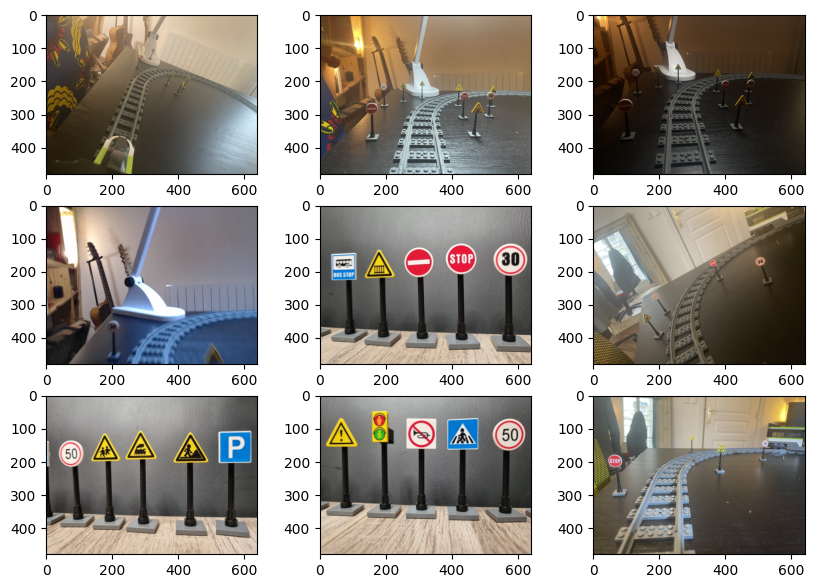

In [33]:
files = [f for f in os.listdir("dataset/images/train")][:9]
fig = plt.figure(figsize=(10, 7))
rows, columns = 3, 3
print(files)
for i, file in enumerate(files):
    fig.add_subplot(rows, columns, i+1)
    image = cv2.imread(pathlib.Path("dataset/images/train") / file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

In [41]:
labels = [f.replace("images", "labeles").replace(".jpg", ".txt") for f in files][2:]
for l in labels:
    with open(pathlib.Path("dataset/labels/train") / l) as f:
        print(l)
        print(f.read())

small_IMG_1513.txt
0 0.195312 0.357292 0.043750 0.060417
0 0.744531 0.431250 0.039062 0.054167
1 0.697656 0.540625 0.060937 0.077083
1 0.401562 0.327083 0.037500 0.041667
1 0.304688 0.340625 0.037500 0.047917
1 0.588281 0.365625 0.035937 0.052083
1 0.747656 0.378125 0.035937 0.047917

1718290441.48.txt
0 0.316406 0.765625 0.054688 0.068750

3.txt
0 0.895312 0.339583 0.175000 0.220833
1 0.278906 0.370833 0.151562 0.187500

small_IMG_1528.txt
0 0.293750 0.570833 0.040625 0.050000
1 0.789062 0.354167 0.059375 0.058333
1 0.253906 0.712500 0.045312 0.075000

1.txt
1 0.278906 0.327083 0.154688 0.187500
1 0.447656 0.316667 0.157812 0.187500
1 0.682031 0.330208 0.173437 0.206250
0 0.119531 0.364583 0.126562 0.179167

2.txt
0 0.889062 0.246875 0.162500 0.214583
1 0.103125 0.233333 0.162500 0.191667

small_IMG_1520.txt
1 0.604688 0.332292 0.043750 0.068750
1 0.468750 0.266667 0.025000 0.045833
0 0.810937 0.304167 0.034375 0.050000

